In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [354]:
df=pd.read_excel(r'C:\Users\Siddhant\Desktop\covid19_dataset.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,PTT,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Basics of dataset

In [355]:
df.shape

(5644, 111)

In [356]:
df.dtypes

Patient ID                                           object
Patient age quantile                                  int64
SARS                                                 object
regular_ ward                                         int64
semi-intensive _unit                                  int64
intensive _care                                       int64
Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Red blood Cells                                     float64
Lymphocytes                                         float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Mean corpuscular hemoglobin (MCH)                   float64
Eosinophils                             

In [357]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS', 'regular_ ward',
       'semi-intensive _unit', 'intensive _care', 'Hematocrit', 'Hemoglobin',
       'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [358]:
df.nunique()

Patient ID                                          5644
Patient age quantile                                  20
SARS                                                   2
regular_ ward                                          2
semi-intensive _unit                                   2
intensive _care                                        2
Hematocrit                                           176
Hemoglobin                                            84
Platelets                                            249
Mean platelet volume                                  48
Red blood Cells                                      211
Lymphocytes                                          318
Mean corpuscular hemoglobin concentration (MCHC)      57
Leukocytes                                           475
Basophils                                             17
Mean corpuscular hemoglobin (MCH)                     91
Eosinophils                                           86
Mean corpuscular volume (MCV)  

# Checking missing values

In [359]:
count=df.isnull().sum()
count

Patient ID                                             0
Patient age quantile                                   0
SARS                                                   0
regular_ ward                                          0
semi-intensive _unit                                   0
intensive _care                                        0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)  

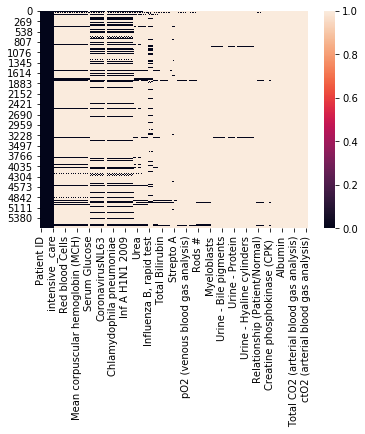

In [360]:
sns.heatmap(df.isnull())

# Since many columns have  huge amount of missing values , threshold of 0.80 would be set to retain the rest of columns

In [361]:
percentage=df.isnull().sum()/len(df)
missing=percentage[percentage>0.80].index
df.drop(missing,axis=1,inplace=True)

In [362]:
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [363]:
df.shape

(5644, 23)

In [364]:
count=df.isnull().sum()
count

Patient ID                        0
Patient age quantile              0
SARS                              0
regular_ ward                     0
semi-intensive _unit              0
intensive _care                   0
Respiratory Syncytial Virus    4290
Influenza A                    4290
Influenza B                    4290
Parainfluenza 1                4292
CoronavirusNL63                4292
Rhinovirus/Enterovirus         4292
Coronavirus HKU1               4292
Parainfluenza 3                4292
Chlamydophila pneumoniae       4292
Adenovirus                     4292
Parainfluenza 4                4292
Coronavirus229E                4292
CoronavirusOC43                4292
Inf A H1N1 2009                4292
Bordetella pertussis           4292
Metapneumovirus                4292
Parainfluenza 2                4292
dtype: int64

In [365]:
df=df[df.Metapneumovirus.notnull()]


In [366]:
count=df.isnull().sum()
count

Patient ID                     0
Patient age quantile           0
SARS                           0
regular_ ward                  0
semi-intensive _unit           0
intensive _care                0
Respiratory Syncytial Virus    0
Influenza A                    0
Influenza B                    0
Parainfluenza 1                0
CoronavirusNL63                0
Rhinovirus/Enterovirus         0
Coronavirus HKU1               0
Parainfluenza 3                0
Chlamydophila pneumoniae       0
Adenovirus                     0
Parainfluenza 4                0
Coronavirus229E                0
CoronavirusOC43                0
Inf A H1N1 2009                0
Bordetella pertussis           0
Metapneumovirus                0
Parainfluenza 2                0
dtype: int64

In [367]:
df.shape

(1352, 23)

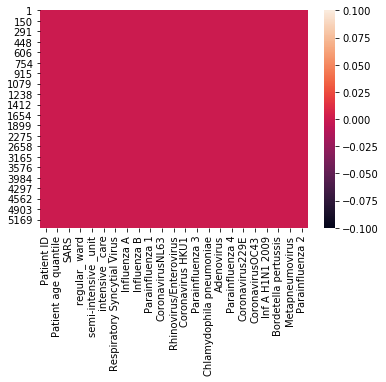

In [368]:
sns.heatmap(df.isnull())

# Thus, the dataset is now complete for further analysis

In [369]:
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,126e9dd13932f68,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
4,d9e41465789c2b5,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
8,8bb9d64f0215244,1,negative,0,1,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
9,5f1ed301375586c,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
13,0fbafd910aa8078,13,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


# Visualization

In [370]:
df.dtypes

Patient ID                     object
Patient age quantile            int64
SARS                           object
regular_ ward                   int64
semi-intensive _unit            int64
intensive _care                 int64
Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
Parainfluenza 1                object
CoronavirusNL63                object
Rhinovirus/Enterovirus         object
Coronavirus HKU1               object
Parainfluenza 3                object
Chlamydophila pneumoniae       object
Adenovirus                     object
Parainfluenza 4                object
Coronavirus229E                object
CoronavirusOC43                object
Inf A H1N1 2009                object
Bordetella pertussis           object
Metapneumovirus                object
Parainfluenza 2                object
dtype: object

In [371]:
dnew=df.drop(columns=['Patient ID'])

In [372]:
dnew.head()

,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
4,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
8,1,negative,0,1,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
9,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
13,13,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


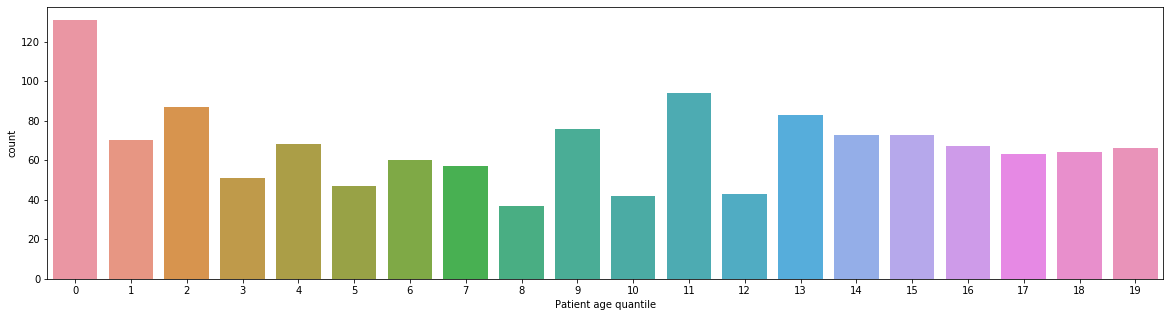

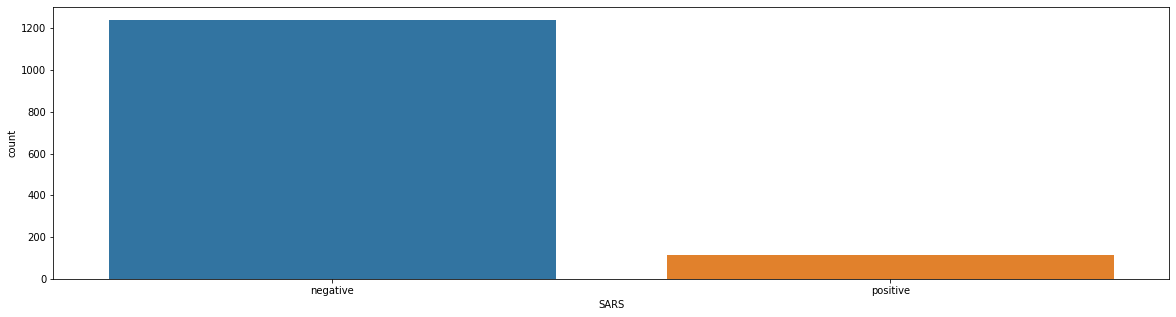

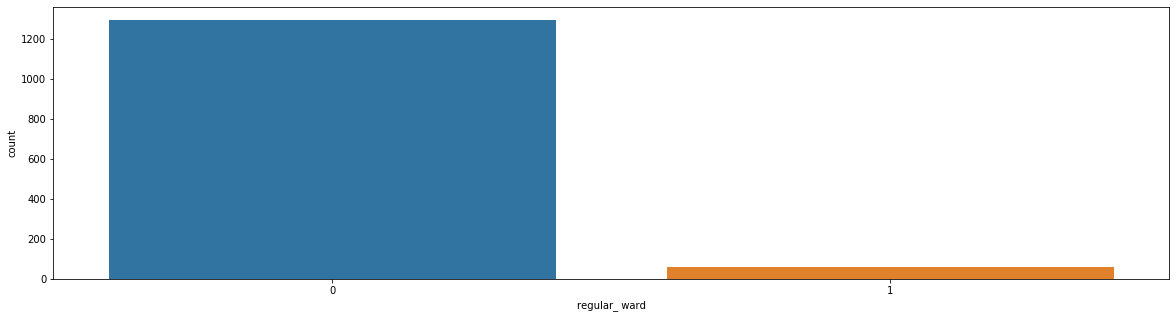

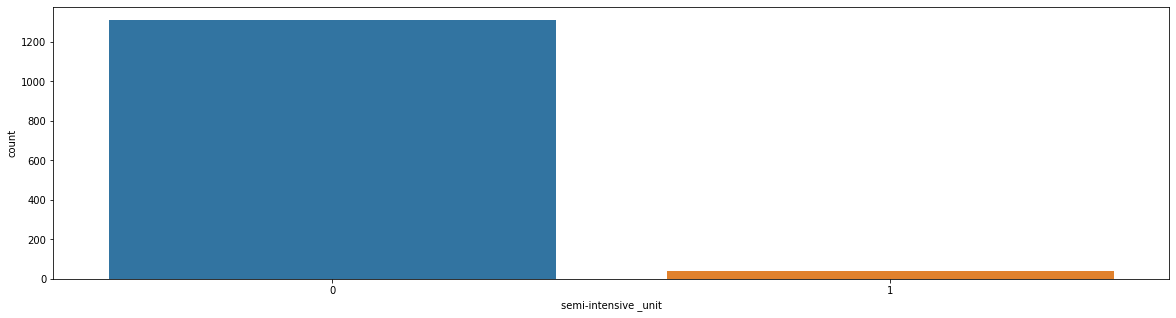

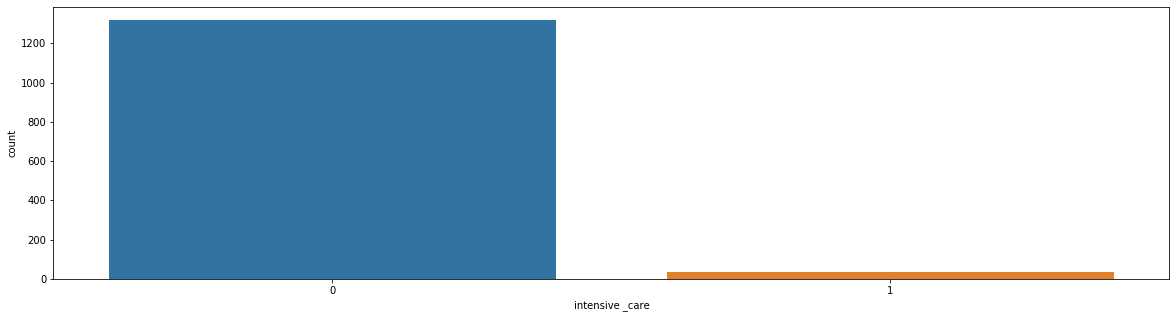

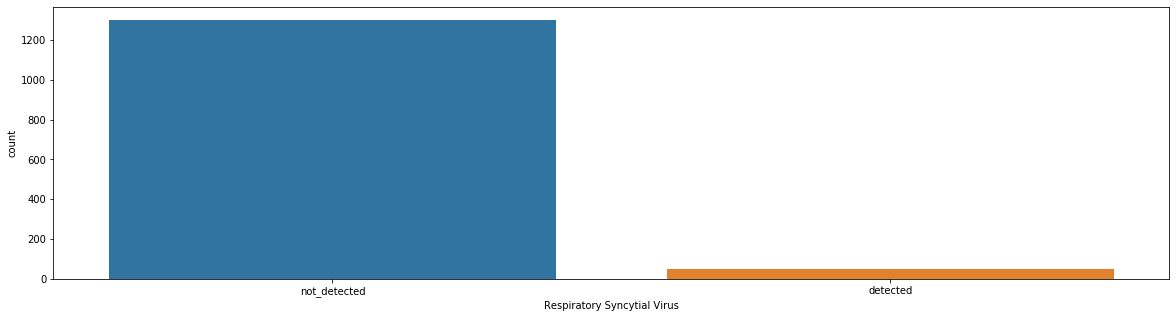

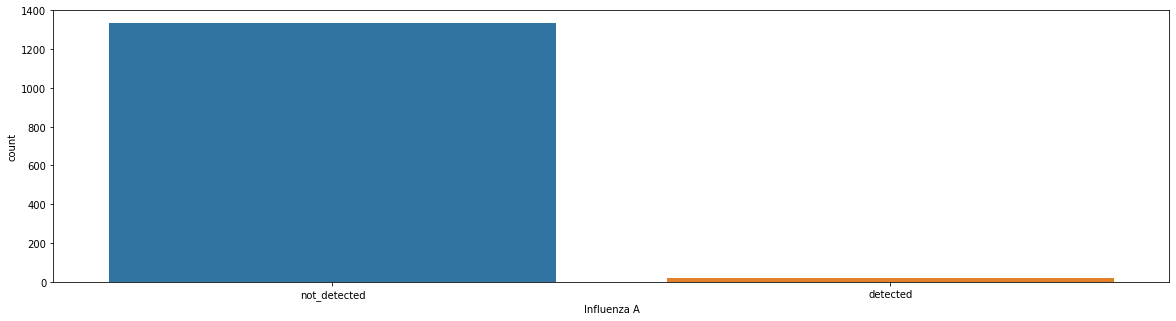

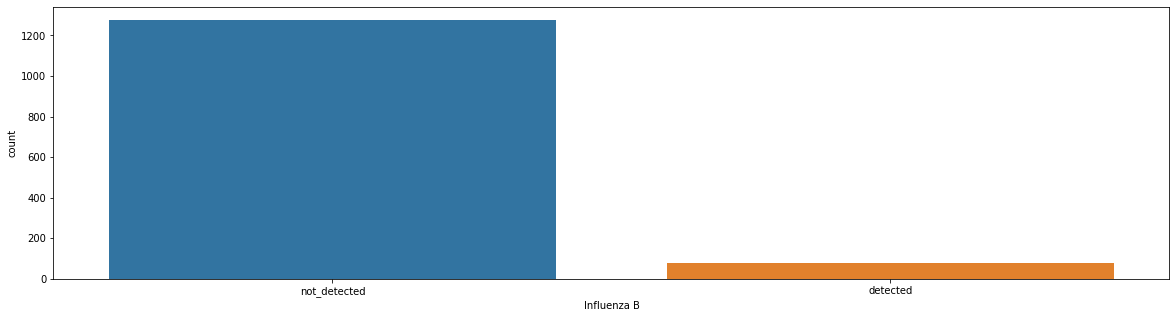

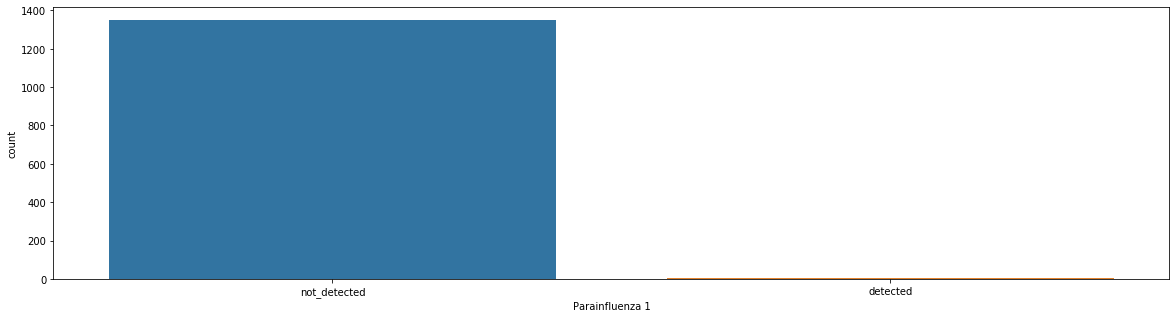

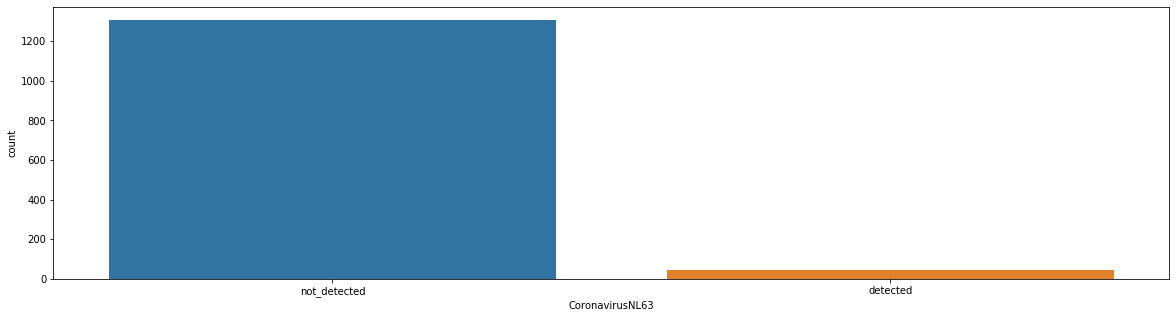

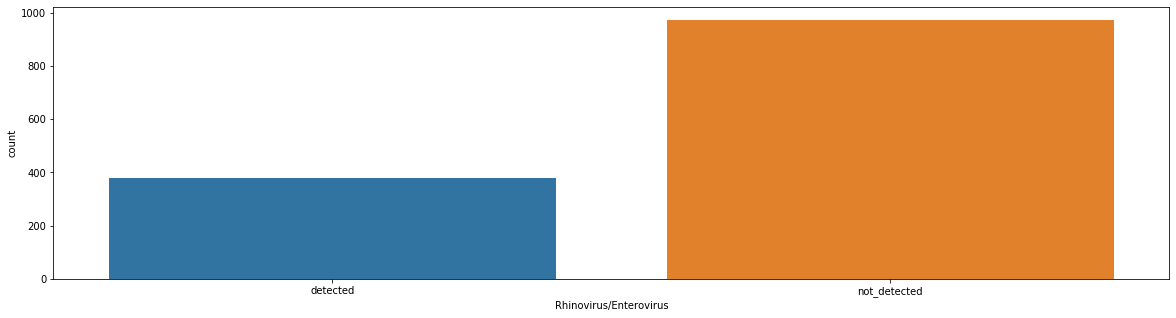

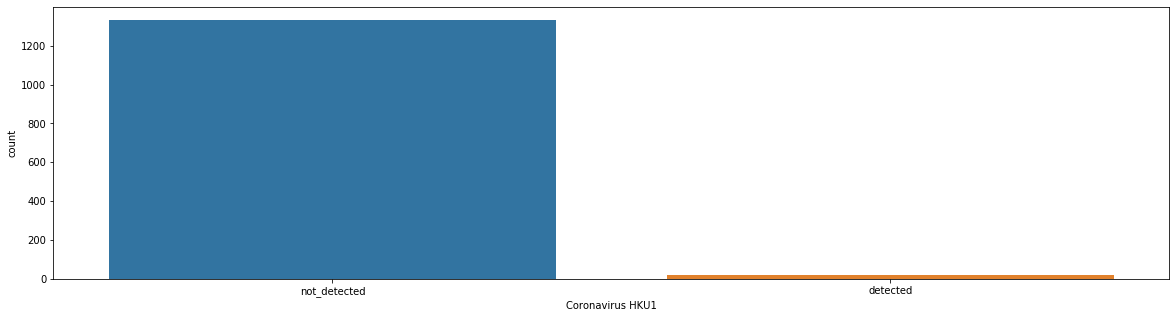

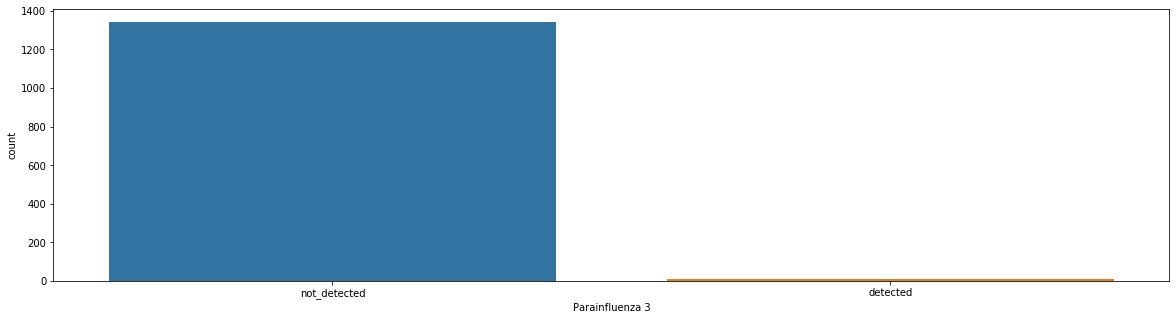

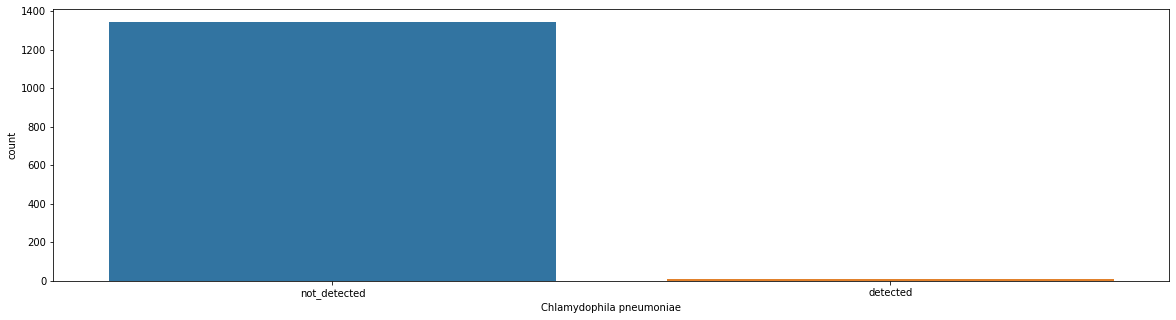

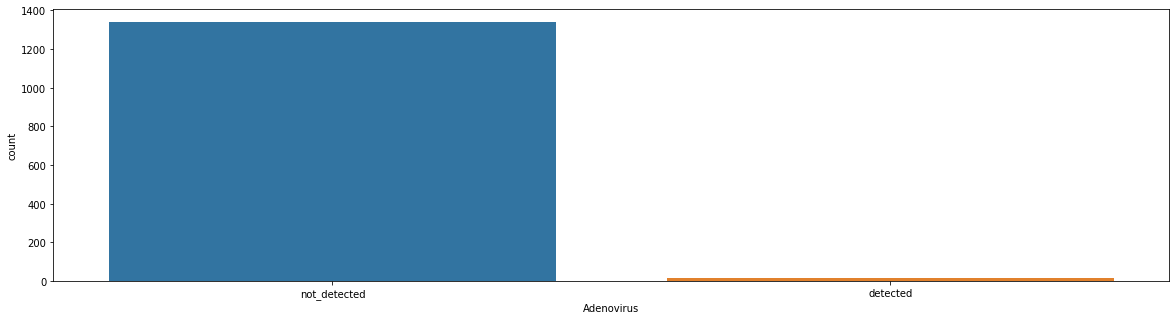

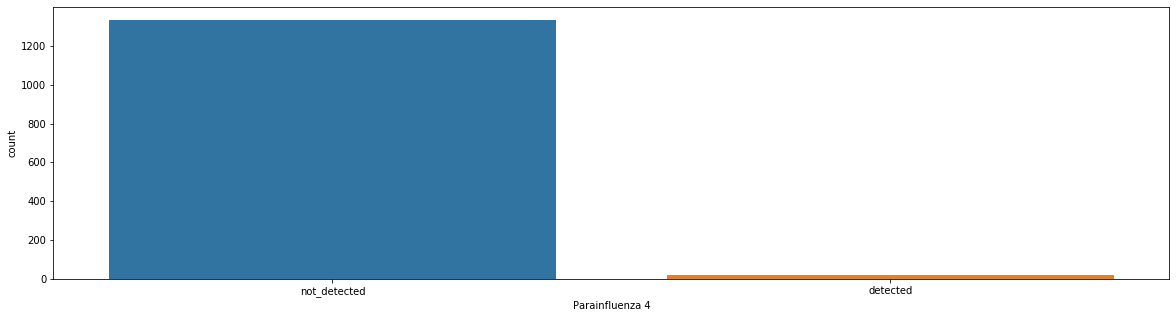

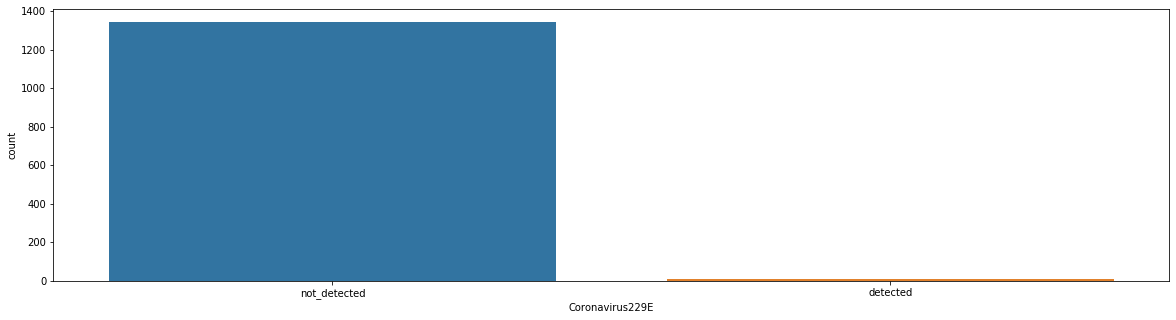

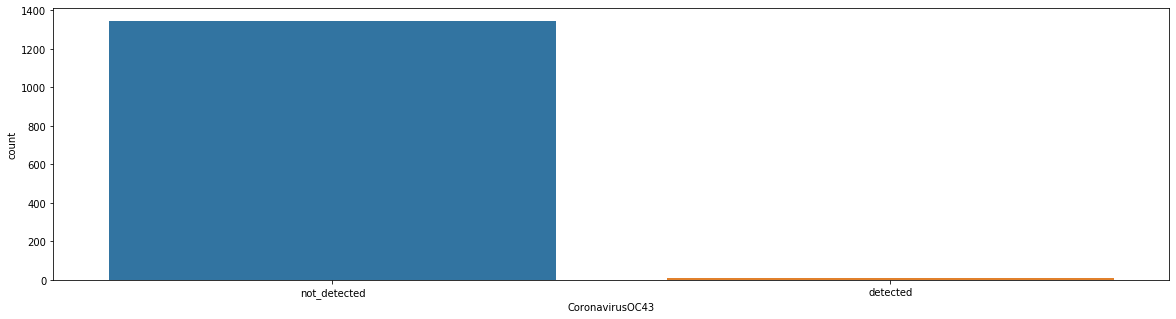

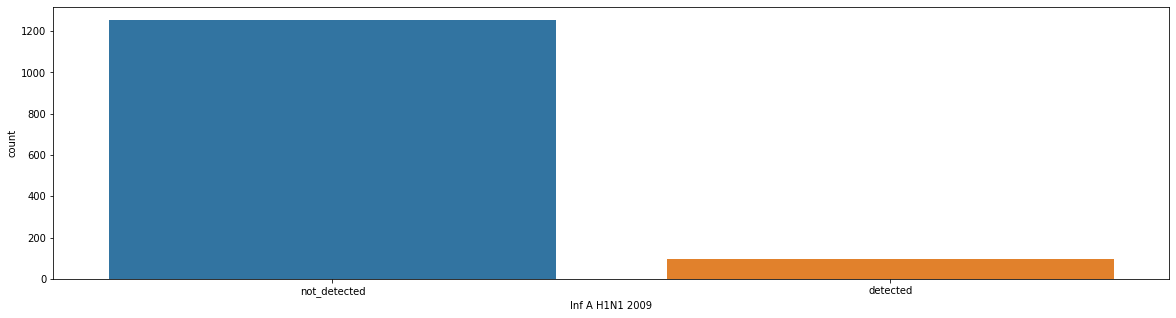

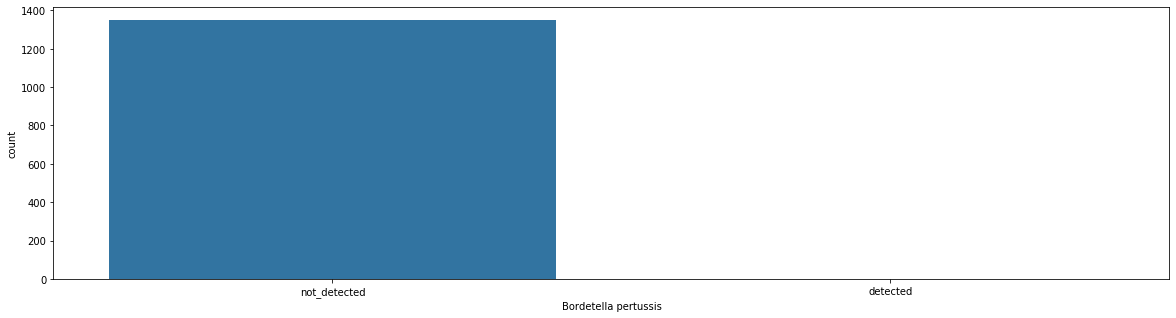

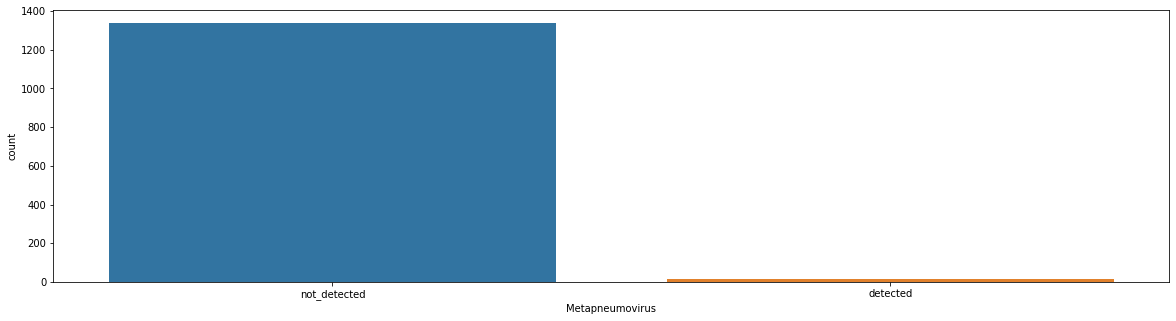

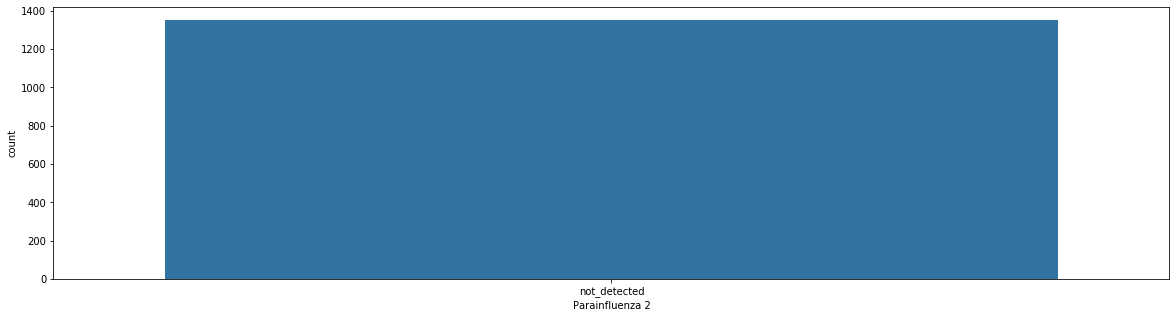

In [373]:
for i in dnew:
    plt.figure(figsize=(20,5))
    sns.countplot(dnew[i])
    plt.show()

In [374]:
dnew.nunique()

Patient age quantile           20
SARS                            2
regular_ ward                   2
semi-intensive _unit            2
intensive _care                 2
Respiratory Syncytial Virus     2
Influenza A                     2
Influenza B                     2
Parainfluenza 1                 2
CoronavirusNL63                 2
Rhinovirus/Enterovirus          2
Coronavirus HKU1                2
Parainfluenza 3                 2
Chlamydophila pneumoniae        2
Adenovirus                      2
Parainfluenza 4                 2
Coronavirus229E                 2
CoronavirusOC43                 2
Inf A H1N1 2009                 2
Bordetella pertussis            2
Metapneumovirus                 2
Parainfluenza 2                 1
dtype: int64

In [375]:
df.drop(columns=['Parainfluenza 2'],inplace=True)

<Figure size 1440x360 with 0 Axes>

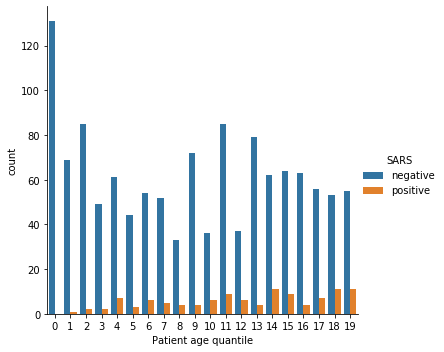

<Figure size 1440x360 with 0 Axes>

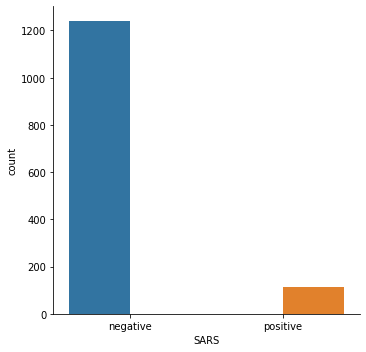

<Figure size 1440x360 with 0 Axes>

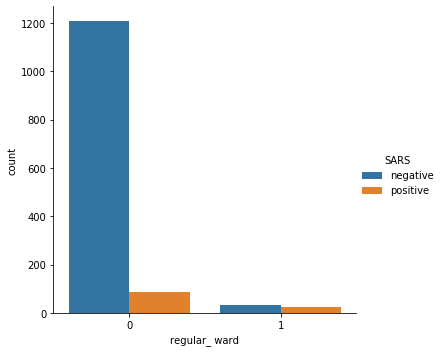

<Figure size 1440x360 with 0 Axes>

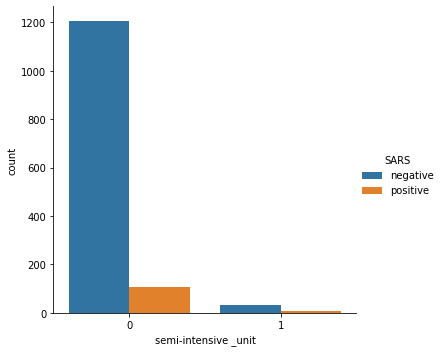

<Figure size 1440x360 with 0 Axes>

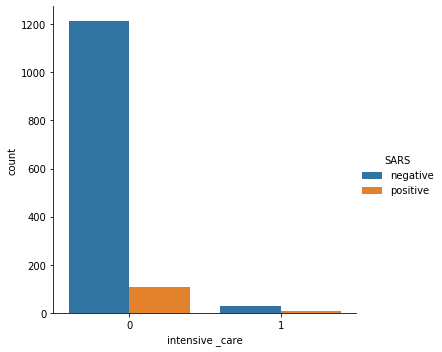

<Figure size 1440x360 with 0 Axes>

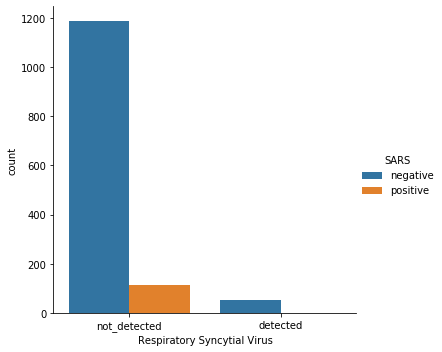

<Figure size 1440x360 with 0 Axes>

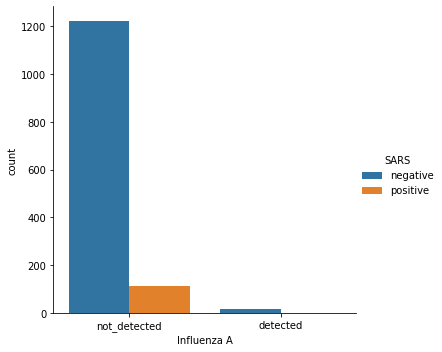

<Figure size 1440x360 with 0 Axes>

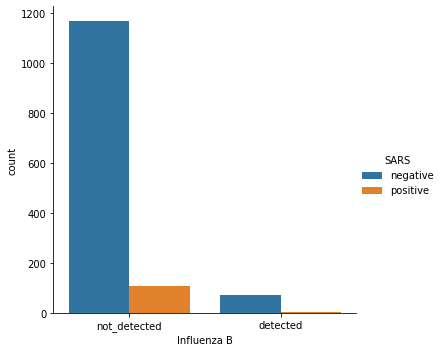

<Figure size 1440x360 with 0 Axes>

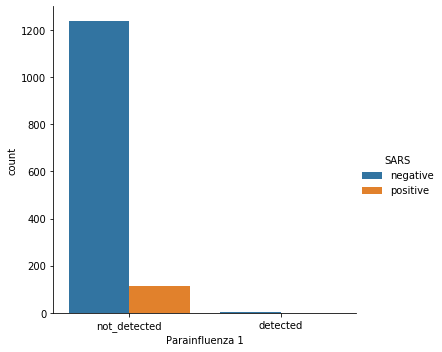

<Figure size 1440x360 with 0 Axes>

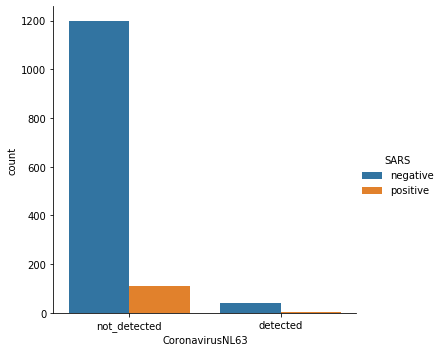

<Figure size 1440x360 with 0 Axes>

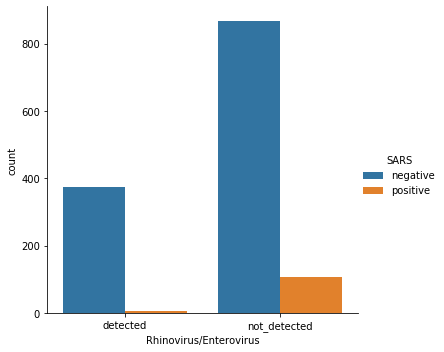

<Figure size 1440x360 with 0 Axes>

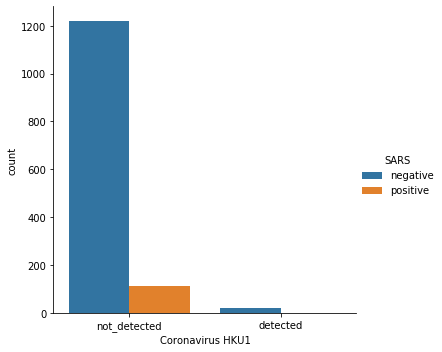

<Figure size 1440x360 with 0 Axes>

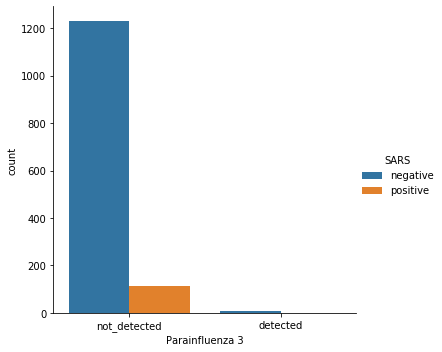

<Figure size 1440x360 with 0 Axes>

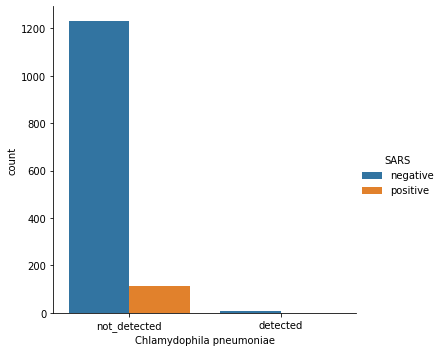

<Figure size 1440x360 with 0 Axes>

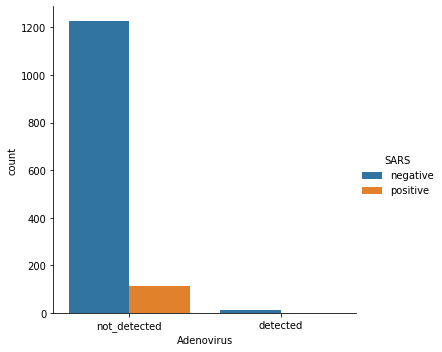

<Figure size 1440x360 with 0 Axes>

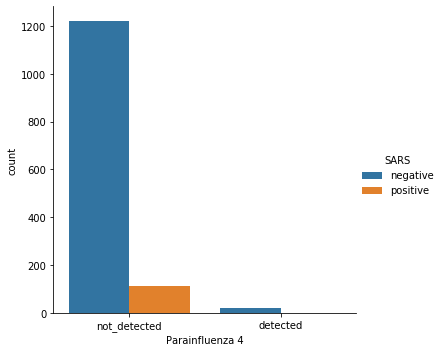

<Figure size 1440x360 with 0 Axes>

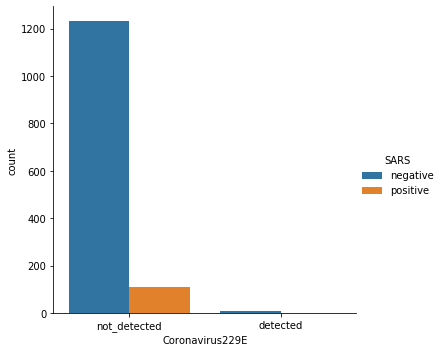

<Figure size 1440x360 with 0 Axes>

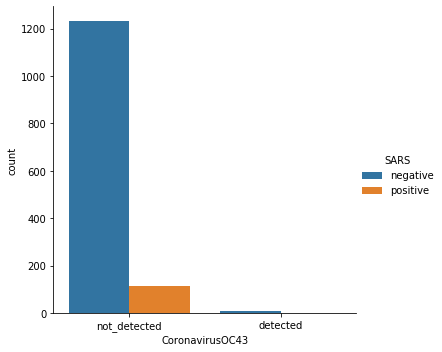

<Figure size 1440x360 with 0 Axes>

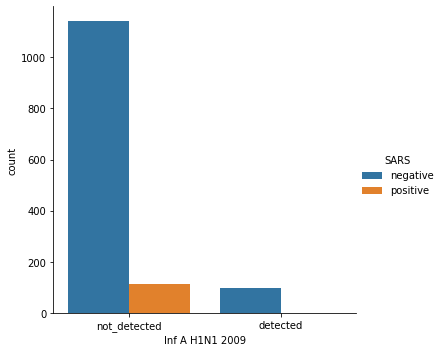

<Figure size 1440x360 with 0 Axes>

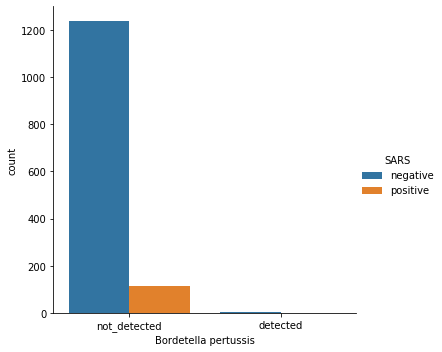

<Figure size 1440x360 with 0 Axes>

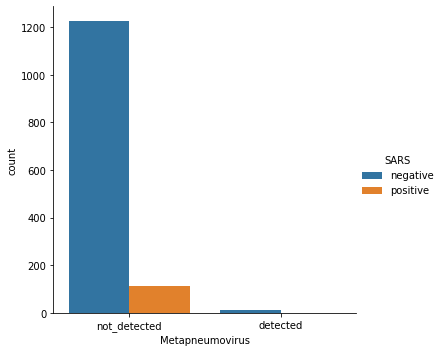

<Figure size 1440x360 with 0 Axes>

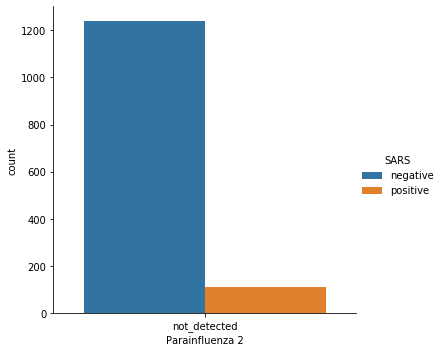

In [376]:
for i in dnew.columns:
    plt.figure(figsize=(20,5))
    sns.catplot(x=i,kind='count',hue='SARS',data=dnew)
    plt.show()

# Using Labelencoder to transform object values into usable numeric data

In [377]:
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
1,126e9dd13932f68,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
4,d9e41465789c2b5,15,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
8,8bb9d64f0215244,1,negative,0,1,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
9,5f1ed301375586c,17,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
13,0fbafd910aa8078,13,negative,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [378]:
from sklearn.preprocessing import LabelEncoder

In [379]:
df.dtypes

Patient ID                     object
Patient age quantile            int64
SARS                           object
regular_ ward                   int64
semi-intensive _unit            int64
intensive _care                 int64
Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
Parainfluenza 1                object
CoronavirusNL63                object
Rhinovirus/Enterovirus         object
Coronavirus HKU1               object
Parainfluenza 3                object
Chlamydophila pneumoniae       object
Adenovirus                     object
Parainfluenza 4                object
Coronavirus229E                object
CoronavirusOC43                object
Inf A H1N1 2009                object
Bordetella pertussis           object
Metapneumovirus                object
dtype: object

In [380]:
for i in ['Patient ID','SARS','Respiratory Syncytial Virus','Influenza A','Influenza B','Parainfluenza 1','CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Parainfluenza 3','Chlamydophila pneumoniae','Adenovirus','Parainfluenza 4','Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Bordetella pertussis','Metapneumovirus']:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])


In [381]:
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
1,121,17,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
4,1143,15,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
8,742,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,540,17,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,102,13,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [382]:
df.dtypes

Patient ID                     int32
Patient age quantile           int64
SARS                           int32
regular_ ward                  int64
semi-intensive _unit           int64
intensive _care                int64
Respiratory Syncytial Virus    int32
Influenza A                    int32
Influenza B                    int32
Parainfluenza 1                int32
CoronavirusNL63                int32
Rhinovirus/Enterovirus         int32
Coronavirus HKU1               int32
Parainfluenza 3                int32
Chlamydophila pneumoniae       int32
Adenovirus                     int32
Parainfluenza 4                int32
Coronavirus229E                int32
CoronavirusOC43                int32
Inf A H1N1 2009                int32
Bordetella pertussis           int32
Metapneumovirus                int32
dtype: object

# Statistics Summary

In [383]:
df.describe()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,675.500000,9.140533,0.082840,0.042899,0.030325,0.024408,0.961538,0.986686,0.943787,0.997781,0.966716,0.719675,0.985207,0.992604,0.993343,0.990385,0.985947,0.993343,0.994083,0.927515,0.998521,0.989645
std,390.433093,6.089956,0.275743,0.202705,0.171545,0.154370,0.192379,0.114656,0.230418,0.047071,0.179444,0.449324,0.120768,0.085716,0.081347,0.097622,0.117754,0.081347,0.076724,0.259386,0.038447,0.101269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,337.750000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,675.500000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1013.250000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1351.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation matrix

In [384]:
dco=df.corr()

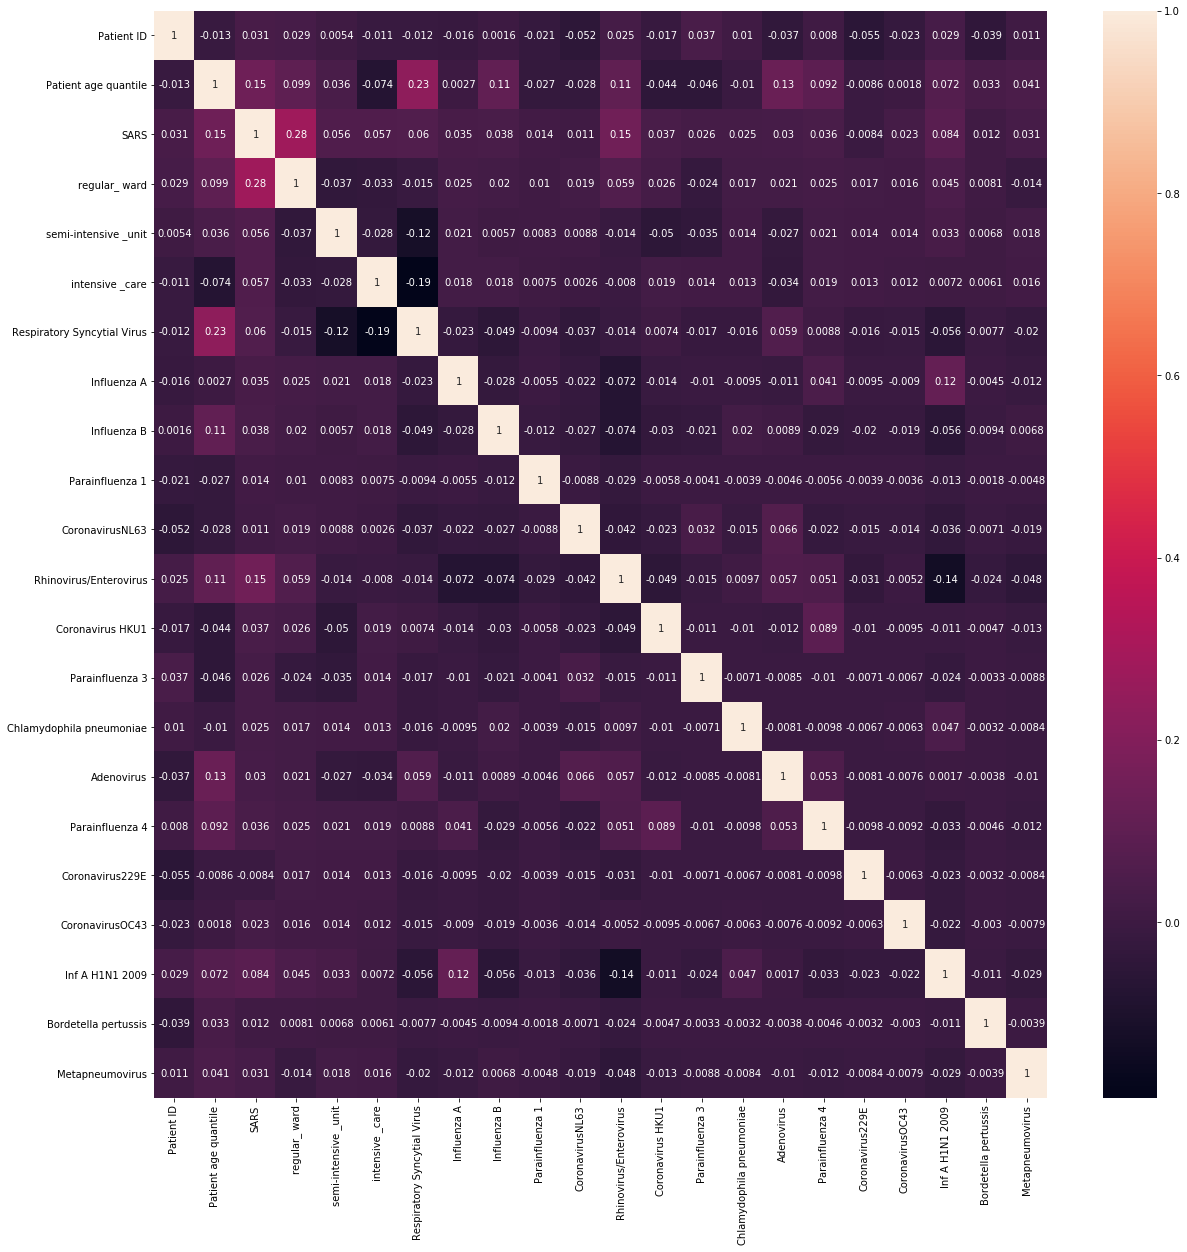

In [385]:
plt.figure(figsize=(20,20))
sns.heatmap(dco,annot=True)

# Checking for skewness and outliers distribution:-

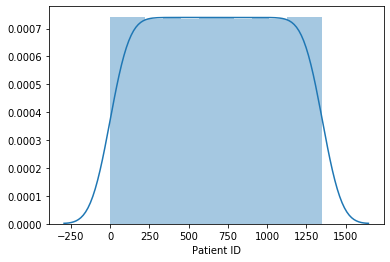

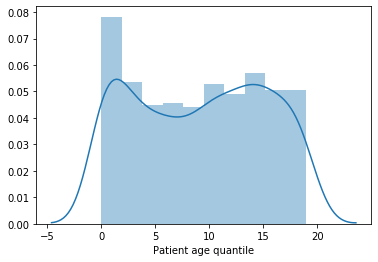

In [386]:
for i in ['Patient ID','Patient age quantile']:
    sns.distplot(df[i])
    plt.show()
    

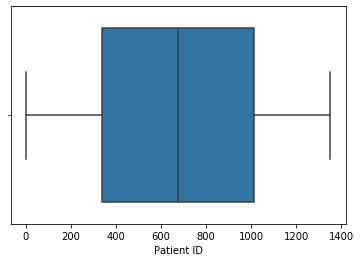

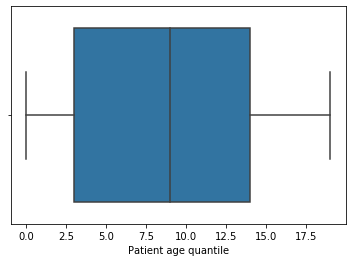

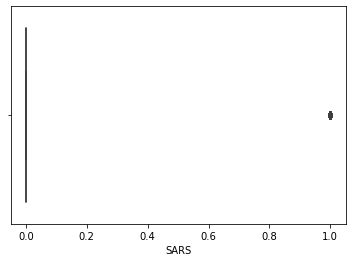

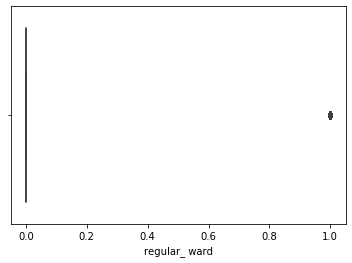

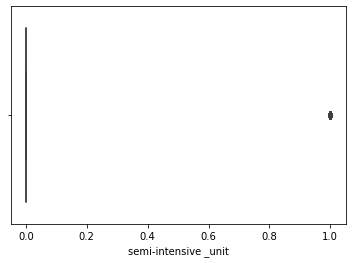

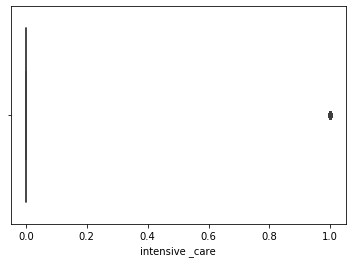

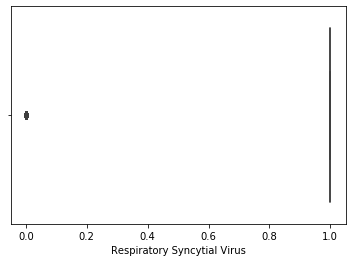

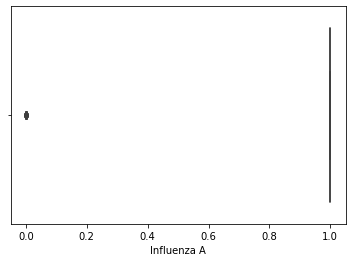

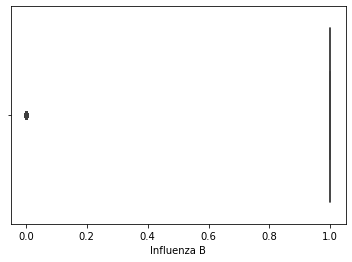

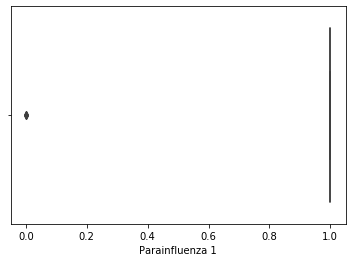

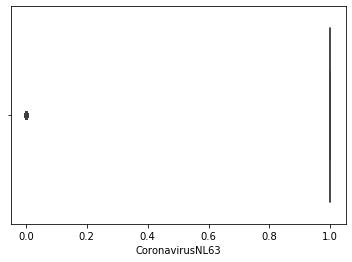

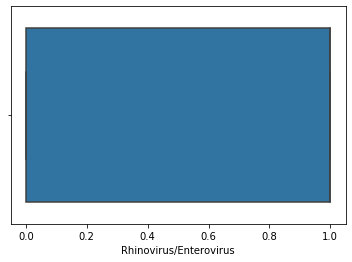

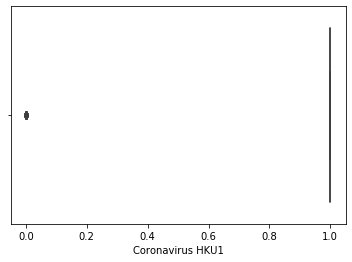

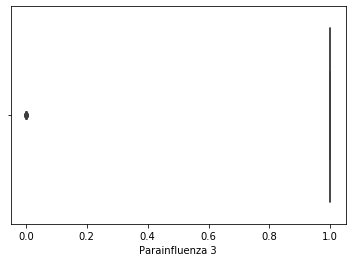

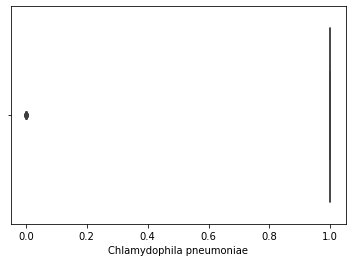

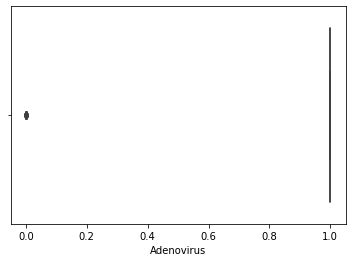

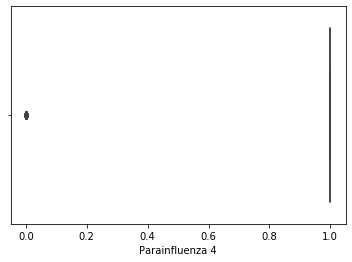

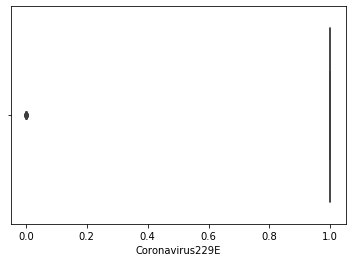

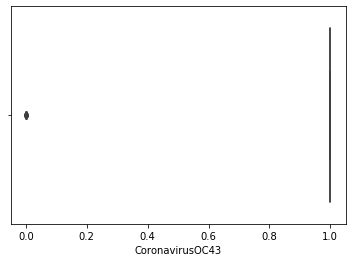

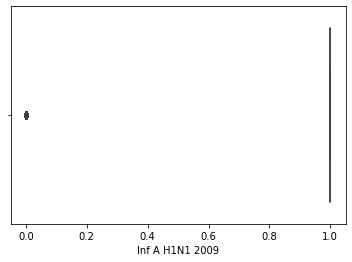

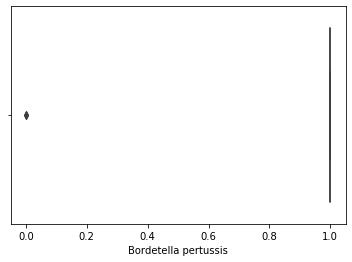

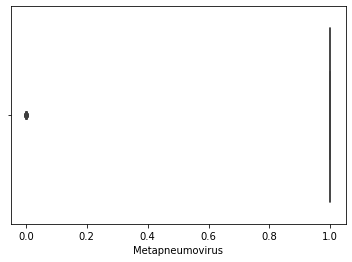

In [387]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# The skewed data and certain outliers need to be cleaned

In [388]:
dcase1=df.drop(columns=['regular_ ward','semi-intensive _unit','intensive _care'])

In [389]:
dcase1.head()

,Patient ID,Patient age quantile,SARS,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
1,121,17,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
4,1143,15,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
8,742,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,540,17,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,102,13,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [390]:
dcase1.nunique()

Patient ID                     1352
Patient age quantile             20
SARS                              2
Respiratory Syncytial Virus       2
Influenza A                       2
Influenza B                       2
Parainfluenza 1                   2
CoronavirusNL63                   2
Rhinovirus/Enterovirus            2
Coronavirus HKU1                  2
Parainfluenza 3                   2
Chlamydophila pneumoniae          2
Adenovirus                        2
Parainfluenza 4                   2
Coronavirus229E                   2
CoronavirusOC43                   2
Inf A H1N1 2009                   2
Bordetella pertussis              2
Metapneumovirus                   2
dtype: int64

In [391]:
dcase1.skew()

Patient ID                      0.000000
Patient age quantile           -0.022620
SARS                            3.030201
Respiratory Syncytial Virus    -4.805333
Influenza A                    -8.502056
Influenza B                    -3.857726
Parainfluenza 1               -21.181695
CoronavirusNL63                -5.209518
Rhinovirus/Enterovirus         -0.979248
Coronavirus HKU1               -8.047277
Parainfluenza 3               -11.510925
Chlamydophila pneumoniae      -12.147274
Adenovirus                    -10.061525
Parainfluenza 4                -8.265816
Coronavirus229E               -12.147274
CoronavirusOC43               -12.898645
Inf A H1N1 2009                -3.301249
Bordetella pertussis          -25.971095
Metapneumovirus                -9.684521
dtype: float64

In [392]:
xn=dcase1.drop(columns=['SARS'])
yn=dcase1['SARS']

In [393]:
for col in xn.columns:
    if xn.skew().loc[col]>0.55:
        xn[col]=np.log1p(xn[col])

In [394]:
xn.isnull().sum()

Patient ID                     0
Patient age quantile           0
Respiratory Syncytial Virus    0
Influenza A                    0
Influenza B                    0
Parainfluenza 1                0
CoronavirusNL63                0
Rhinovirus/Enterovirus         0
Coronavirus HKU1               0
Parainfluenza 3                0
Chlamydophila pneumoniae       0
Adenovirus                     0
Parainfluenza 4                0
Coronavirus229E                0
CoronavirusOC43                0
Inf A H1N1 2009                0
Bordetella pertussis           0
Metapneumovirus                0
dtype: int64

# Now,scaling of data has to be done

In [395]:
from sklearn.preprocessing import StandardScaler

In [396]:
scale=StandardScaler()
xn=scale.fit_transform(xn)

In [397]:
xd=pd.DataFrame(xn)

In [398]:
xd.skew()

0    -1.747543e-16
1    -2.261998e-02
2    -4.805333e+00
3    -8.502056e+00
4    -3.857726e+00
5    -2.118169e+01
6    -5.209518e+00
7    -9.792480e-01
8    -8.047277e+00
9    -1.151092e+01
10   -1.214727e+01
11   -1.006153e+01
12   -8.265816e+00
13   -1.214727e+01
14   -1.289864e+01
15   -3.301249e+00
16   -2.597110e+01
17   -9.684521e+00
dtype: float64

In [399]:
xd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [400]:
yn.isnull().sum()

0

# Splitting the dataset at 20% into train and test dataset with output variable yn

In [401]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=42)

In [402]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib

In [403]:
print(xtrain.shape,xtest.shape)

(1081, 18) (271, 18)


In [404]:
print(ytrain.shape,ytest.shape)

(1081,) (271,)


In [405]:
def maxacc_score(regr,xd,yn):
    max_ac_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        acc_scr=accuracy_score(ytest,ypred)
        print('acc score corresponding to ',r_state,'is',acc_scr)
        if acc_scr> max_ac_score:
            max_ac_score= acc_scr
            finalrstate=r_state
    print('max acc score corresponding to',finalrstate,'is',max_ac_score)
    return finalrstate

# GRID SEARCHCV

In [406]:
lr = LogisticRegression()
svc = SVC(probability=True)
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

parameters={'C': [10, 1.0, 0.1, 0.01]}
clf=GridSearchCV(lr,parameters)
clf.fit(xd,yn)
print('best LR parameters is :',clf.best_params_)
print('\n')
parameters={'C': [10, 1.0,0.1],'kernel':['poly', 'rbf']}
clf=GridSearchCV(svc,parameters)
clf.fit(xd,yn)
print('best SVC parameters is :',clf.best_params_)
print('\n')
parameters={'criterion':['gini', 'entropy']}
clf=GridSearchCV(dtc,parameters)
clf.fit(xd,yn)
print('best DTC parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters)
clf.fit(xd,yn)
print('best KNC parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(xd,yn)
print('best RFC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(xd,yn)
print('best GBC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtc]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd,yn)
print('best ADACLASS parameters is :',clf.best_params_)
print('\n')

best LR parameters is : {'C': 10}


best SVC parameters is : {'C': 10, 'kernel': 'rbf'}


best DTC parameters is : {'criterion': 'entropy'}


best KNC parameters is : {'n_neighbors': 22}


best RFC parameters is : {'n_estimators': 100}


best GBC parameters is : {'learning_rate': 0.01, 'n_estimators': 50}


best ADACLASS parameters is : {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'learning_rate': 0.01, 'n_estimators': 50}




In [407]:
gn=GaussianNB()
r_state=maxacc_score(gn,xd,yn)
print('\n')
lr = LogisticRegression(C=10)
r_state=maxacc_score(lr,xd,yn)
print('\n')
svc = SVC(C=10,kernel='rbf')
r_state=maxacc_score(svc,xd,yn)
print('\n')
dtc=DecisionTreeClassifier(criterion='entropy')
r_state=maxacc_score(dtc,xd,yn)
print('\n')
knc=KNeighborsClassifier(n_neighbors= 22)
r_state=maxacc_score(knc,xd,yn)
print('\n')
rfc=RandomForestClassifier(n_estimators=100)
r_state=maxacc_score(rfc,xd,yn)
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50)
r_state=maxacc_score(gbc,xd,yn)
print('\n')
adareg=AdaBoostClassifier(learning_rate=0.01,n_estimators=50,base_estimator=lr)
r_state=maxacc_score(ada,xd,yn)
print('\n')

acc score corresponding to  42 is 0.2730627306273063
acc score corresponding to  43 is 0.2878228782287823
acc score corresponding to  44 is 0.26199261992619927
acc score corresponding to  45 is 0.25830258302583026
acc score corresponding to  46 is 0.24723247232472326
acc score corresponding to  47 is 0.2656826568265683
acc score corresponding to  48 is 0.23985239852398524
acc score corresponding to  49 is 0.25461254612546125
acc score corresponding to  50 is 0.25092250922509224
acc score corresponding to  51 is 0.2952029520295203
acc score corresponding to  52 is 0.28413284132841327
acc score corresponding to  53 is 0.2767527675276753
acc score corresponding to  54 is 0.2952029520295203
acc score corresponding to  55 is 0.2878228782287823
acc score corresponding to  56 is 0.3247232472324723
acc score corresponding to  57 is 0.2878228782287823
acc score corresponding to  58 is 0.2693726937269373
acc score corresponding to  59 is 0.28044280442804426
acc score corresponding to  60 is 0.29

acc score corresponding to  81 is 0.9188191881918819
acc score corresponding to  82 is 0.915129151291513
acc score corresponding to  83 is 0.8966789667896679
acc score corresponding to  84 is 0.9188191881918819
acc score corresponding to  85 is 0.915129151291513
acc score corresponding to  86 is 0.9188191881918819
acc score corresponding to  87 is 0.9188191881918819
acc score corresponding to  88 is 0.8892988929889298
acc score corresponding to  89 is 0.9077490774907749
acc score corresponding to  90 is 0.8929889298892989
acc score corresponding to  91 is 0.9040590405904059
acc score corresponding to  92 is 0.9298892988929889
acc score corresponding to  93 is 0.9040590405904059
acc score corresponding to  94 is 0.933579335793358
acc score corresponding to  95 is 0.915129151291513
acc score corresponding to  96 is 0.915129151291513
acc score corresponding to  97 is 0.9261992619926199
acc score corresponding to  98 is 0.915129151291513
acc score corresponding to  99 is 0.9003690036900369

acc score corresponding to  59 is 0.8892988929889298
acc score corresponding to  60 is 0.8560885608856088
acc score corresponding to  61 is 0.8782287822878229
acc score corresponding to  62 is 0.8819188191881919
acc score corresponding to  63 is 0.9077490774907749
acc score corresponding to  64 is 0.8782287822878229
acc score corresponding to  65 is 0.8708487084870848
acc score corresponding to  66 is 0.8634686346863468
acc score corresponding to  67 is 0.9003690036900369
acc score corresponding to  68 is 0.8929889298892989
acc score corresponding to  69 is 0.8966789667896679
acc score corresponding to  70 is 0.8892988929889298
acc score corresponding to  71 is 0.9003690036900369
acc score corresponding to  72 is 0.8745387453874539
acc score corresponding to  73 is 0.8929889298892989
acc score corresponding to  74 is 0.8966789667896679
acc score corresponding to  75 is 0.8597785977859779
acc score corresponding to  76 is 0.8708487084870848
acc score corresponding to  77 is 0.9003690036

acc score corresponding to  97 is 0.922509225092251
acc score corresponding to  98 is 0.915129151291513
acc score corresponding to  99 is 0.9003690036900369
max acc score corresponding to 71 is 0.948339483394834




In [408]:
models=[]
models.append(('GNB',gn))
models.append(('LogisticRegression',lr))
models.append(('SVC',svc))
models.append(('DTC',dtc))
models.append(('kNeighborsClassifier',knc))
models.append(('RFC',rfc))
models.append(('GBC',gbc))
models.append(('ADACLASS',ada))

In [409]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score

****,name,****


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy score 0.2730627306273063


Cross val score 0.2669755364220309


roc_auc score 0.6075697211155379


classification report
               precision    recall  f1-score   support

           0       1.00      0.22      0.35       251
           1       0.09      1.00      0.17        20

    accuracy                           0.27       271
   macro avg       0.55      0.61      0.26       271
weighted avg       0.93      0.27      0.34       271



[[ 54 197]
 [  0  20]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****,name,****


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.9261992619926199


Cross val score 0.9171627

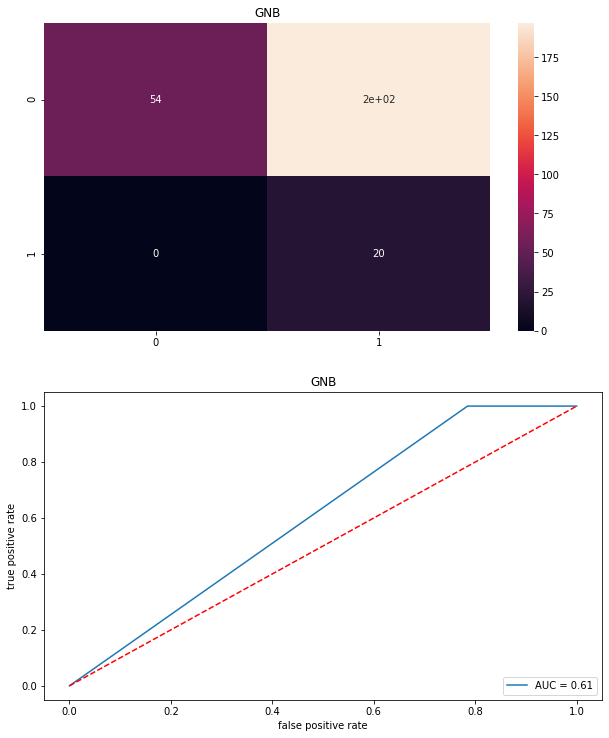

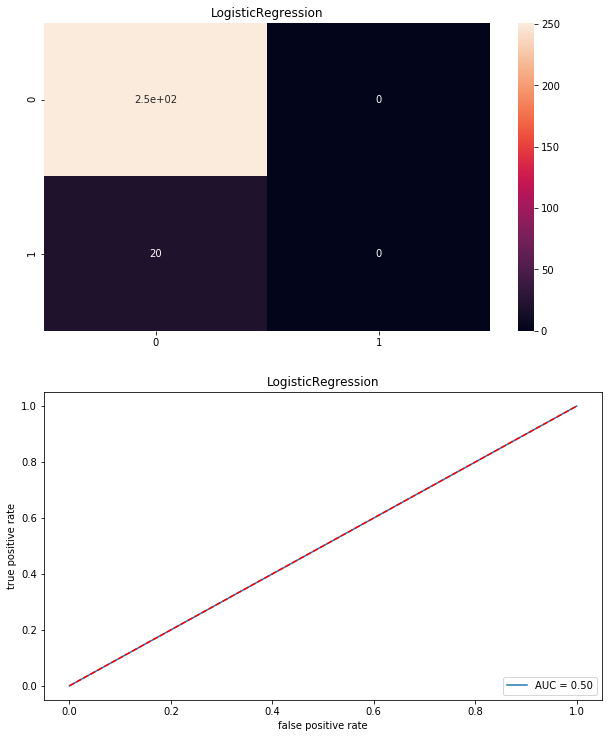

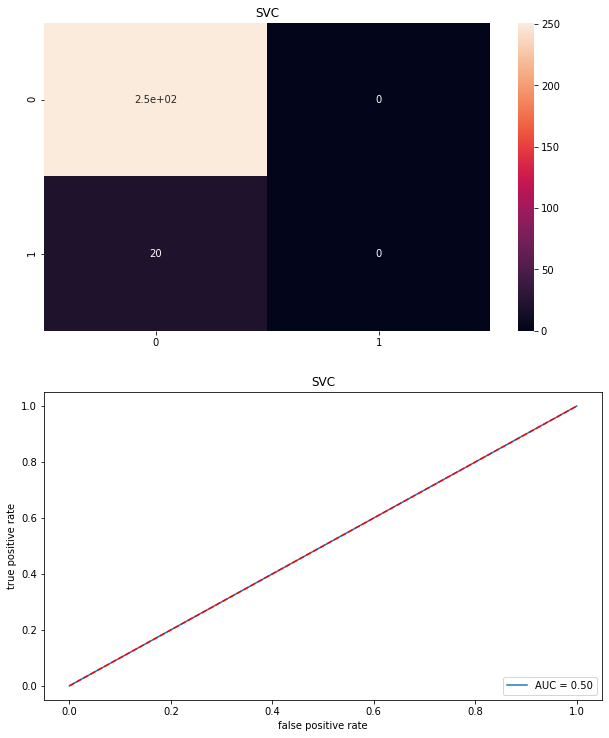

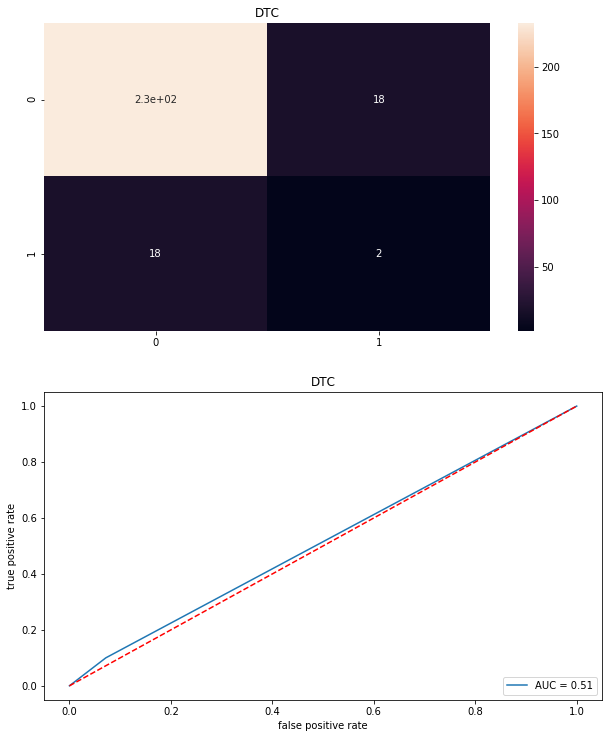

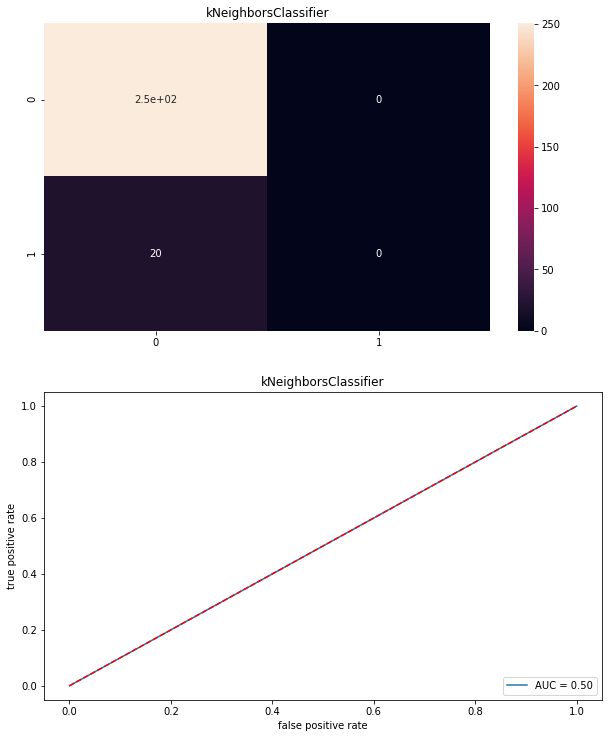

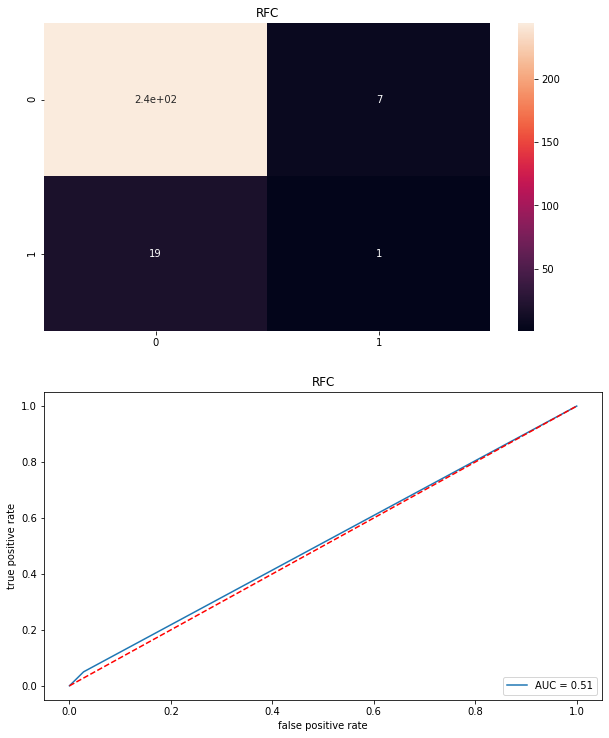

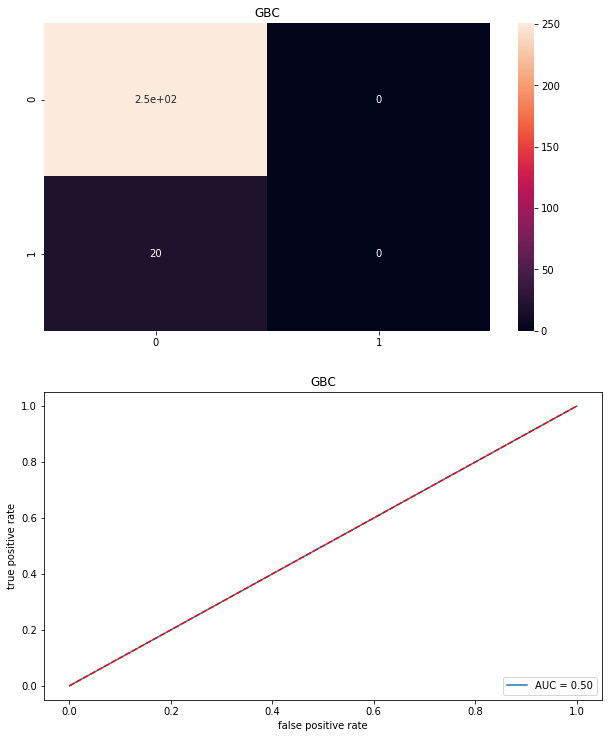

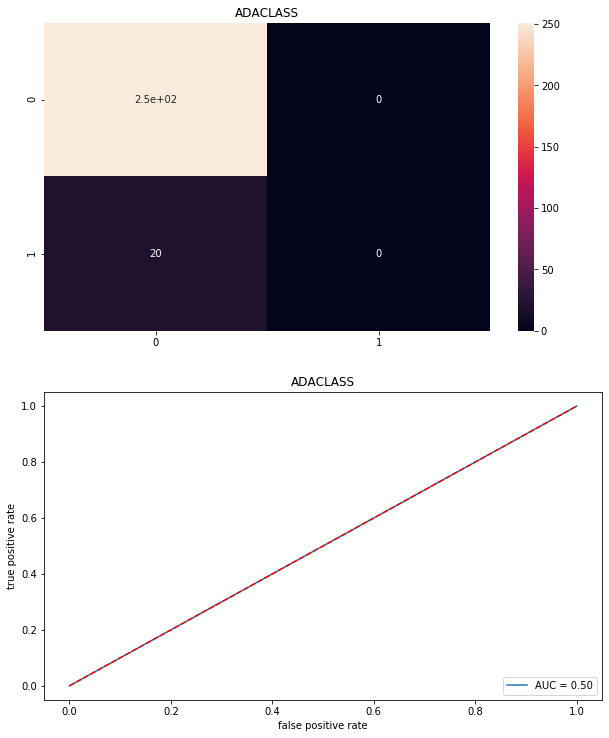

In [410]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    AS=accuracy_score(ytest,pre)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,xd,yn,cv=5,scoring='accuracy').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(ytest,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report\n',classification_report(ytest,pre))
    print('\n')
    cm=confusion_matrix(ytest,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,60))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot( false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    print('\n\n')
    

In [411]:
result=pd.DataFrame({'Model':Model,'Accuracy_score': score,'Cross val score': cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross val score,Roc_auc_curve
0,GNB,27.306273,26.697554,60.756972
1,LogisticRegression,92.619926,91.716277,50.000000
2,SVC,92.619926,91.716277,50.000000
3,DTC,86.715867,84.391417,51.414343
4,kNeighborsClassifier,92.619926,91.716277,50.000000
5,RFC,90.405904,88.683067,51.105578
6,GBC,92.619926,91.716277,50.000000
7,ADACLASS,92.619926,91.272379,50.000000


# After having tried all the above models , GBC is working best
Also, random state corresponding to max acc score in GBC is 71

In [412]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=71)
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)

# Final model is as follows

In [413]:
print('accuracy score of GBC is',accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print('\n')

accuracy score of GBC is 0.948339483394834
[[257   0]
 [ 14   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       257
           1       0.00      0.00      0.00        14

    accuracy                           0.95       271
   macro avg       0.47      0.50      0.49       271
weighted avg       0.90      0.95      0.92       271





# Saving the  model

In [417]:
joblib.dump(gbc,'Model_covid19.obj')

['Model_covid19.obj']

In [418]:
model=joblib.load('Model_covid19.obj')

In [419]:
model.predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

# Now , the second case to find the type of admitted

In [420]:
df.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
1,121,17,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
4,1143,15,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
8,742,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,540,17,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13,102,13,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [421]:
df.shape

(1352, 22)

In [422]:
df.dtypes

Patient ID                     int32
Patient age quantile           int64
SARS                           int32
regular_ ward                  int64
semi-intensive _unit           int64
intensive _care                int64
Respiratory Syncytial Virus    int32
Influenza A                    int32
Influenza B                    int32
Parainfluenza 1                int32
CoronavirusNL63                int32
Rhinovirus/Enterovirus         int32
Coronavirus HKU1               int32
Parainfluenza 3                int32
Chlamydophila pneumoniae       int32
Adenovirus                     int32
Parainfluenza 4                int32
Coronavirus229E                int32
CoronavirusOC43                int32
Inf A H1N1 2009                int32
Bordetella pertussis           int32
Metapneumovirus                int32
dtype: object

In [423]:
df2 = df[df.SARS != 0]

In [424]:
df2.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus
284,1128,16,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
513,928,10,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
568,384,2,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
884,891,15,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1108,836,14,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [425]:
df2.shape

(112, 22)

# Above data is the one of only positive cases

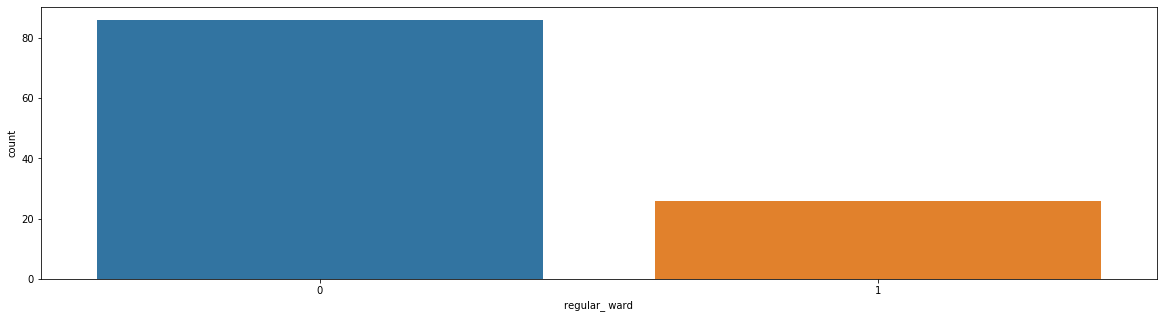

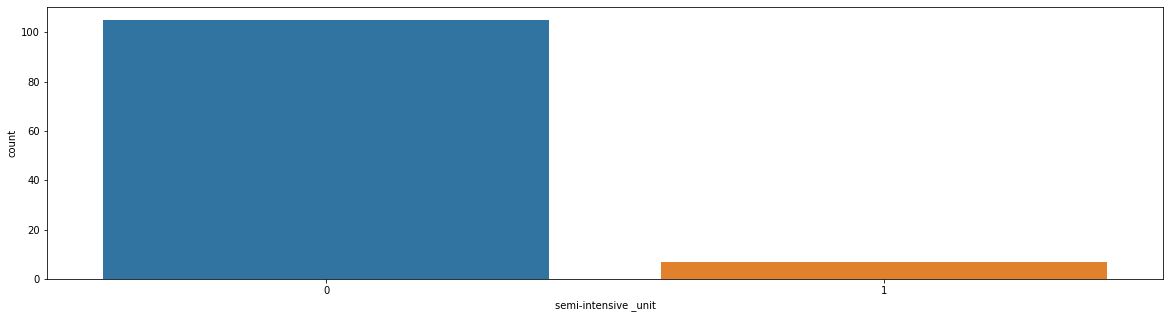

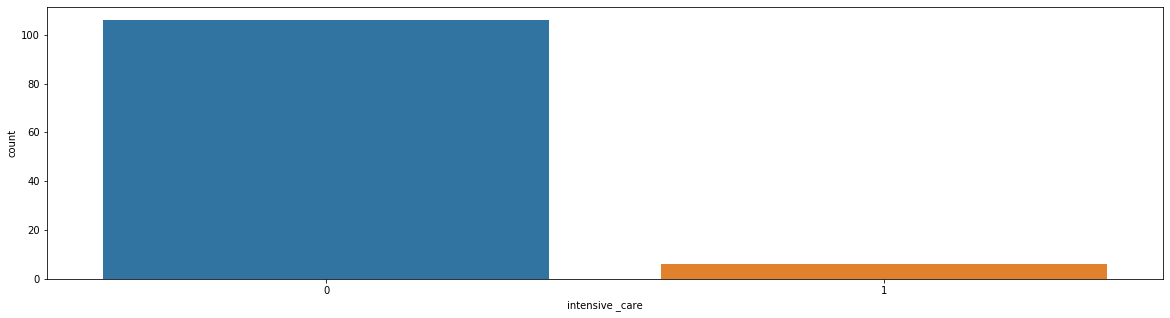

In [426]:
for i in ['regular_ ward','semi-intensive _unit','intensive _care']:
    plt.figure(figsize=(20,5))
    sns.countplot(df2[i])
    plt.show()

# Now we need to give different numbers to each admission
(ie regular=1,semi=2,icu=3)

In [427]:
df2['semi-intensive _unit'].replace(1,2,inplace=True)

In [428]:
df2['intensive _care'].replace(1,3,inplace=True)

In [429]:
df2['admit']=df2['regular_ ward']+df2['semi-intensive _unit']+df2['intensive _care']

In [430]:
df2.head()

,Patient ID,Patient age quantile,SARS,regular_ ward,semi-intensive _unit,intensive _care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,admit
284,1128,16,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
513,928,10,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
568,384,2,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
884,891,15,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1108,836,14,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [431]:
df2.shape

(112, 23)

In [432]:
df2.drop(columns=['regular_ ward','semi-intensive _unit','intensive _care'],inplace=True)

In [433]:
df2.head()

,Patient ID,Patient age quantile,SARS,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,admit
284,1128,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
513,928,10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
568,384,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
884,891,15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1108,836,14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [434]:
df2.shape

(112, 20)

In [435]:
df2.nunique()

Patient ID                     112
Patient age quantile            19
SARS                             1
Respiratory Syncytial Virus      1
Influenza A                      1
Influenza B                      2
Parainfluenza 1                  1
CoronavirusNL63                  2
Rhinovirus/Enterovirus           2
Coronavirus HKU1                 1
Parainfluenza 3                  1
Chlamydophila pneumoniae         1
Adenovirus                       1
Parainfluenza 4                  1
Coronavirus229E                  2
CoronavirusOC43                  1
Inf A H1N1 2009                  1
Bordetella pertussis             1
Metapneumovirus                  1
admit                            4
dtype: int64

In [436]:
df2.skew()

Patient ID                     -0.148356
Patient age quantile           -0.349687
SARS                            0.000000
Respiratory Syncytial Virus     0.000000
Influenza A                     0.000000
Influenza B                    -5.941687
Parainfluenza 1                 0.000000
CoronavirusNL63                -5.941687
Rhinovirus/Enterovirus         -4.019289
Coronavirus HKU1                0.000000
Parainfluenza 3                 0.000000
Chlamydophila pneumoniae        0.000000
Adenovirus                      0.000000
Parainfluenza 4                 0.000000
Coronavirus229E               -10.583005
CoronavirusOC43                 0.000000
Inf A H1N1 2009                 0.000000
Bordetella pertussis            0.000000
Metapneumovirus                 0.000000
admit                           1.672380
dtype: float64

In [437]:
xn2=df2.drop(columns=['admit'])
zn=df2['admit']

In [438]:
xn2.shape

(112, 19)

In [439]:
zn.shape

(112,)

# scaling of data

In [440]:
xn2=scale.fit_transform(xn2)

In [441]:
xd2=pd.DataFrame(xn2)

In [442]:
xd2.skew()

0     -0.148356
1     -0.349687
2      0.000000
3      0.000000
4      0.000000
5     -5.941687
6      0.000000
7     -5.941687
8     -4.019289
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14   -10.583005
15     0.000000
16     0.000000
17     0.000000
18     0.000000
dtype: float64

In [443]:
xd2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [444]:
zn.isnull().sum()

0

In [445]:
xd2.shape

(112, 19)

In [446]:
zn.shape

(112,)

# Splitting the dataset at 20% into train and test dataset with output variable zn

In [447]:
xtrain,xtest,ytrain,ytest=train_test_split(xd2,zn,test_size=.10,random_state=42)

In [448]:
print(xtrain.shape,xtest.shape)

(100, 19) (12, 19)


In [449]:
print(ytrain.shape,ytest.shape)

(100,) (12,)


In [450]:
def maxacc_score(regr,xd2,zn):
    max_ac_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd2,zn,test_size=.20,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        acc_scr=accuracy_score(ytest,ypred)
        print('acc score corresponding to ',r_state,'is',acc_scr)
        if acc_scr> max_ac_score:
            max_ac_score= acc_scr
            finalrstate=r_state
    print('max acc score corresponding to',finalrstate,'is',max_ac_score)
    return finalrstate

# GRID SEARCHCV

In [451]:
lr = LogisticRegression()
svc = SVC(probability=True)
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

parameters={'C': [10, 1.0, 0.1, 0.01]}
clf=GridSearchCV(lr,parameters)
clf.fit(xd2,zn)
print('best LR parameters is :',clf.best_params_)
print('\n')
parameters={'C': [10, 1.0,0.1],'kernel':['poly', 'rbf']}
clf=GridSearchCV(svc,parameters)
clf.fit(xd2,zn)
print('best SVC parameters is :',clf.best_params_)
print('\n')
parameters={'criterion':['gini', 'entropy']}
clf=GridSearchCV(dtc,parameters)
clf.fit(xd2,zn)
print('best DTC parameters is :',clf.best_params_)
print('\n')
parameters={'n_neighbors':range(1,30)}
clf=GridSearchCV(knc,parameters)
clf.fit(xd2,zn)
print('best KNC parameters is :',clf.best_params_)
print('\n')
parameters={'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(xd2,zn)
print('best RFC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(xd2,zn)
print('best GBC parameters is :',clf.best_params_)
print('\n')
parameters={'learning_rate':[0.01,0.1,1],'n_estimators':[50,100,150,200,250,300],'base_estimator':[lr,dtc]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(xd2,zn)
print('best ADACLASS parameters is :',clf.best_params_)
print('\n')

best LR parameters is : {'C': 0.01}


best SVC parameters is : {'C': 10, 'kernel': 'poly'}


best DTC parameters is : {'criterion': 'gini'}


best KNC parameters is : {'n_neighbors': 21}


best RFC parameters is : {'n_estimators': 100}


best GBC parameters is : {'learning_rate': 0.01, 'n_estimators': 50}


best ADACLASS parameters is : {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'learning_rate': 0.01, 'n_estimators': 50}




In [452]:
lr = LogisticRegression(C=0.01)
r_state=maxacc_score(lr,xd2,zn)
print('\n')
svc = SVC(C=10,kernel='poly')
r_state=maxacc_score(svc,xd2,zn)
print('\n')
dtc=DecisionTreeClassifier(criterion='gini')
r_state=maxacc_score(dtc,xd2,zn)
print('\n')
knc=KNeighborsClassifier(n_neighbors= 21)
r_state=maxacc_score(knc,xd2,zn)
print('\n')
rfc=RandomForestClassifier(n_estimators=100)
r_state=maxacc_score(rfc,xd2,zn)
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=50)
r_state=maxacc_score(gbc,xd2,zn)
print('\n')
adareg=AdaBoostClassifier(learning_rate=0.01,n_estimators=50,base_estimator=lr)
r_state=maxacc_score(ada,xd2,zn)
print('\n')

acc score corresponding to  42 is 0.6956521739130435
acc score corresponding to  43 is 0.6086956521739131
acc score corresponding to  44 is 0.6086956521739131
acc score corresponding to  45 is 0.6521739130434783
acc score corresponding to  46 is 0.782608695652174
acc score corresponding to  47 is 0.6086956521739131
acc score corresponding to  48 is 0.6086956521739131
acc score corresponding to  49 is 0.6956521739130435
acc score corresponding to  50 is 0.6956521739130435
acc score corresponding to  51 is 0.5652173913043478
acc score corresponding to  52 is 0.782608695652174
acc score corresponding to  53 is 0.6956521739130435
acc score corresponding to  54 is 0.6086956521739131
acc score corresponding to  55 is 0.6956521739130435
acc score corresponding to  56 is 0.6956521739130435
acc score corresponding to  57 is 0.6521739130434783
acc score corresponding to  58 is 0.782608695652174
acc score corresponding to  59 is 0.782608695652174
acc score corresponding to  60 is 0.69565217391304

acc score corresponding to  90 is 0.4782608695652174
acc score corresponding to  91 is 0.5217391304347826
acc score corresponding to  92 is 0.5652173913043478
acc score corresponding to  93 is 0.30434782608695654
acc score corresponding to  94 is 0.5652173913043478
acc score corresponding to  95 is 0.5652173913043478
acc score corresponding to  96 is 0.5217391304347826
acc score corresponding to  97 is 0.5217391304347826
acc score corresponding to  98 is 0.6956521739130435
acc score corresponding to  99 is 0.6086956521739131
max acc score corresponding to 74 is 0.6956521739130435


acc score corresponding to  42 is 0.6956521739130435
acc score corresponding to  43 is 0.6086956521739131
acc score corresponding to  44 is 0.6086956521739131
acc score corresponding to  45 is 0.6521739130434783
acc score corresponding to  46 is 0.782608695652174
acc score corresponding to  47 is 0.6086956521739131
acc score corresponding to  48 is 0.6086956521739131
acc score corresponding to  49 is 0.65217

acc score corresponding to  68 is 0.6956521739130435
acc score corresponding to  69 is 0.7391304347826086
acc score corresponding to  70 is 0.7391304347826086
acc score corresponding to  71 is 0.5217391304347826
acc score corresponding to  72 is 0.5217391304347826
acc score corresponding to  73 is 0.6086956521739131
acc score corresponding to  74 is 0.6956521739130435
acc score corresponding to  75 is 0.6521739130434783
acc score corresponding to  76 is 0.7391304347826086
acc score corresponding to  77 is 0.6521739130434783
acc score corresponding to  78 is 0.782608695652174
acc score corresponding to  79 is 0.782608695652174
acc score corresponding to  80 is 0.6086956521739131
acc score corresponding to  81 is 0.43478260869565216
acc score corresponding to  82 is 0.6521739130434783
acc score corresponding to  83 is 0.6956521739130435
acc score corresponding to  84 is 0.6521739130434783
acc score corresponding to  85 is 0.782608695652174
acc score corresponding to  86 is 0.652173913043

In [453]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',svc))
models.append(('DTC',dtc))
models.append(('kNeighborsClassifier',knc))
models.append(('RFC',rfc))
models.append(('GBC',gbc))
models.append(('ADACLASS',ada))

In [454]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****,name,****')
    print('\n')
    Model.append(name)
    model.fit(xtrain,ytrain)
    print(model)
    pre=model.predict(xtest)
    print('\n')
    AS=accuracy_score(ytest,pre)
    print('accuracy score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,xd2,zn,cv=5,scoring='accuracy').mean()
    print('Cross val score',sc)
    cvs.append(sc*100)
    print('\n')
    

****,name,****


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.8333333333333334


Cross val score 0.6521739130434783


****,name,****


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


accuracy score 0.8333333333333334


Cross val score 0.6521739130434783


****,name,****


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split

In [455]:
result=pd.DataFrame({'Model':Model,'Accuracy_score': score,'Cross val score': cvs})
result

,Model,Accuracy_score,Cross val score
0,LogisticRegression,83.333333,65.217391
1,SVC,83.333333,65.217391
2,DTC,41.666667,49.920949
3,kNeighborsClassifier,83.333333,66.126482
4,RFC,66.666667,53.438735
5,GBC,83.333333,64.308300
6,ADACLASS,75.000000,53.596838


# After having tried all the above models , KNC is working best
Also, random state corresponding to max acc score in KNC is 46

In [456]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,yn,test_size=.20,random_state=46)
knc=KNeighborsClassifier(n_neighbors= 21)
knc.fit(xtrain,ytrain)
ypred=knc.predict(xtest)

# Final model is as follows

In [457]:
print('accuracy score of KNC is',accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print('\n')

accuracy score of KNC is 0.940959409594096
[[255   1]
 [ 15   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       256
           1       0.00      0.00      0.00        15

    accuracy                           0.94       271
   macro avg       0.47      0.50      0.48       271
weighted avg       0.89      0.94      0.92       271





# Saving the model

In [458]:
joblib.dump(knc,'Model2_covid19.obj')

['Model2_covid19.obj']

In [459]:
model=joblib.load('Model2_covid19.obj')

In [460]:
model.predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])